<a href="https://colab.research.google.com/github/johanesPao/tensorflow_developer_certificate/blob/main/03_introduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. SUch as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we've modified it to only use two classes (pizza 🍕 & steak 🥩) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [40]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-06-01 16:46:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 74.125.197.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   324MB/s    in 0.3s    

2022-06-01 16:46:57 (324 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [41]:
!ls pizza_steak

test  train


In [42]:
!ls pizza_steak/train

pizza  steak


In [43]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [44]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} images in \'{dirpath}\'.')

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [45]:
# Another way to find out how many images are in a folder
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

To visualize our images, first let's get the class names programmatically.

In [46]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [47]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')

    print(f'Image shape: {img.shape}') # show the shape of the image

    return img

['771878.jpg']
Image shape: (512, 384, 3)


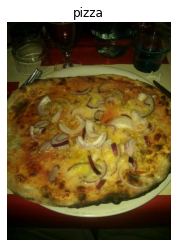

In [48]:
# View a random image from the training dataset
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='pizza')

In [49]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[ 4,  5,  0],
        [ 5,  6,  1],
        [ 6,  7,  2],
        ...,
        [ 6,  9,  2],
        [ 4,  7,  0],
        [ 2,  5,  0]],

       [[ 4,  5,  0],
        [ 5,  6,  1],
        [ 6,  7,  2],
        ...,
        [ 4,  7,  0],
        [ 4,  7,  0],
        [ 3,  6,  0]],

       [[ 3,  4,  0],
        [ 4,  5,  0],
        [ 5,  6,  1],
        ...,
        [ 2,  4,  0],
        [ 3,  5,  0],
        [ 5,  7,  2]],

       ...,

       [[ 2,  7,  1],
        [ 3,  8,  2],
        [ 3,  8,  2],
        ...,
        [ 5, 13,  0],
        [ 5, 13,  0],
        [ 5, 13,  0]],

       [[ 2,  7,  1],
        [ 3,  8,  2],
        [ 3,  8,  2],
        ...,
        [ 5, 13,  0],
        [ 6, 14,  1],
        [ 6, 14,  1]],

       [[ 2,  7,  1],
        [ 3,  8,  2],
        [ 3,  8,  2],
        ...,
        [ 5, 13,  0],
        [ 6, 14,  1],
        [ 6, 14,  1]]], dtype=uint8)>

In [50]:
# View the image shape
img.shape # returns height, width, color channels

(512, 384, 3)

🔑 **Note:** As we've discussed before, many machine laerning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255. (since 255 is the maximum pixel value).

In [51]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.01568627, 0.01960784, 0.        ],
        [0.01960784, 0.02352941, 0.00392157],
        [0.02352941, 0.02745098, 0.00784314],
        ...,
        [0.02352941, 0.03529412, 0.00784314],
        [0.01568627, 0.02745098, 0.        ],
        [0.00784314, 0.01960784, 0.        ]],

       [[0.01568627, 0.01960784, 0.        ],
        [0.01960784, 0.02352941, 0.00392157],
        [0.02352941, 0.02745098, 0.00784314],
        ...,
        [0.01568627, 0.02745098, 0.        ],
        [0.01568627, 0.02745098, 0.        ],
        [0.01176471, 0.02352941, 0.        ]],

       [[0.01176471, 0.01568627, 0.        ],
        [0.01568627, 0.01960784, 0.        ],
        [0.01960784, 0.02352941, 0.00392157],
        ...,
        [0.00784314, 0.01568627, 0.        ],
        [0.01176471, 0.01960784, 0.        ],
        [0.01960784, 0.02745098, 0.00784314]],

       ...,

       [[0.00784314, 0.02745098, 0.00392157],
        [0.01176471, 0.03137255, 0.00784314],
        [0.01176471, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [52]:
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
#train_datagen = ImageDataGenerator(rescale=1./255)
#valid_datagen = ImageDataGenerator(rescale=1./255)
# DEPRECATED!

# Setup paths to our data directories
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from directories and turn it into batches
scaling_layer = tf.keras.layers.Rescaling(1./255)
train_data = image_dataset_from_directory(directory=train_dir,
                                          batch_size=32,
                                          image_size=(224, 224),
                                          seed=42)
train_data_scaled = train_data.map(lambda x, y: (scaling_layer(x), y))
valid_data = image_dataset_from_directory(directory=test_dir,
                                          batch_size=32,
                                          image_size=(224, 224),
                                          seed=42)
valid_data_scaled = valid_data.map(lambda x, y: (scaling_layer(x), y))

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data_scaled, 
                        epochs=5,
                        steps_per_epoch=len(train_data_scaled),
                        validation_data=valid_data_scaled,
                        validation_steps=len(valid_data_scaled))

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 5s 95ms/step - loss: 0.6011 - accuracy: 0.6713 - val_loss: 0.4495 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 4s 85ms/step - loss: 0.4462 - accuracy: 0.7953 - val_loss: 0.4202 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 4s 83ms/step - loss: 0.3989 - accuracy: 0.8320 - val_loss: 0.3414 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 5s 93ms/step - loss: 0.3654 - accuracy: 0.8480 - val_loss: 0.3315 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 4s 85ms/step - loss: 0.3367 - accuracy: 0.8607 - val_loss: 0.3126 - val_accuracy: 0.8860


> 🔑 **Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU (you may have to rerun some cells above).

In [53]:
# Epoch 1/5
# 47/47 [==============================] - 83s 2s/step - loss: 0.6014 - accuracy: 0.6707 - val_loss: 0.4496 - val_accuracy: 0.7960

In [54]:
# Get a model summary
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_11 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_13 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the [TensorFlow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.57217&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [55]:
train_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [56]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 4s 68ms/step - loss: 121.9062 - accuracy: 0.4900 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 4s 67ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 4s 75ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 3s 67ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 3s 67ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [57]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_11 (Dense)            (None, 4)                 602116    
                                                                 
 dense_12 (Dense)            (None, 4)                 20        
                                                                 
 dense_13 (Dense)            (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try to improve it.

In [58]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 4s 70ms/step - loss: 609.9274 - accuracy: 0.6173 - val_loss: 177.8128 - val_accuracy: 0.7720
Epoch 2/5
47/47 [==============================] - 4s 71ms/step - loss: 292.9599 - accuracy: 0.6927 - val_loss: 108.0111 - val_accuracy: 0.6980
Epoch 3/5
47/47 [==============================] - 4s 83ms/step - loss: 108.7847 - accuracy: 0.7180 - val_loss: 53.1230 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 4s 69ms/step - loss: 70.5347 - accuracy: 0.7280 - val_loss: 38.4549 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 4s 68ms/step - loss: 67.0732 - accuracy: 0.7493 - val_loss: 206.3416 - val_accuracy: 0.6220


In [59]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 150528)            0         
                                                                 
 dense_14 (Dense)            (None, 100)               15052900  
                                                                 
 dense_15 (Dense)            (None, 100)               10100     
                                                                 
 dense_16 (Dense)            (None, 100)               10100     
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Created a model (start with a baseline)
4. Fit the model
5. Adjust different parameters and imporve the model (try to beat our baseline)
7. Repeat until satisified (experiment, experiment, experiment)

### 1. Become one with the data

['413325.jpg']
Image shape: (384, 512, 3)
['1654444.jpg']
Image shape: (289, 512, 3)


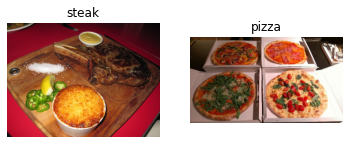

In [60]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

## 2. Preprocess the data (prepare it for a model)

In [61]:
# Define directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health... https://twitter.com/ylecun/status/989610208497360896?lang=en

In [62]:
from tensorflow.keras.utils import image_dataset_from_directory

# Import data from directories and turn it into batches
scaling_layer = tf.keras.layers.Rescaling(1./255)
train_data = image_dataset_from_directory(directory=train_dir, # Target directory of images
                                          label_mode='binary', # type of data you're working with
                                          batch_size=32, # size of minibatches to load data into
                                          image_size=(224, 224), # Target size of images (height, width)
                                          seed=42)
train_data_scaled = train_data.map(lambda x, y: (scaling_layer(x), y))
test_data = image_dataset_from_directory(directory=test_dir,
                                          label_mode='binary',
                                          batch_size=32,
                                          image_size=(224, 224),
                                          seed=42)
test_data_scaled = valid_data.map(lambda x, y: (scaling_layer(x), y))

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [63]:
len(train_data_scaled)

47

In [64]:
for images, labels in train_data_scaled.take(1):
    print(images[0].shape, labels[0].shape, images, labels)

(224, 224, 3) (1,) tf.Tensor(
[[[[4.20034289e-01 2.18266070e-01 6.46070987e-02]
   [4.25735325e-01 2.23967120e-01 7.03081265e-02]
   [4.04044151e-01 2.09401280e-01 6.52661100e-02]
   ...
   [2.17713509e-02 2.00629421e-02 9.30717867e-03]
   [7.33046979e-03 6.71524229e-03 0.00000000e+00]
   [4.58801072e-03 1.28925573e-02 0.00000000e+00]]

  [[4.14301991e-01 2.24298477e-01 6.74357265e-02]
   [4.17174399e-01 2.27170885e-01 7.03081265e-02]
   [3.98225576e-01 2.16450348e-01 6.60351664e-02]
   ...
   [1.25350151e-02 8.99230968e-03 4.68558632e-03]
   [2.27350183e-03 9.11781564e-04 0.00000000e+00]
   [3.40992888e-03 1.53122041e-02 4.30672336e-03]]

  [[4.03680235e-01 2.30826095e-01 6.80672303e-02]
   [4.08228308e-01 2.37424970e-01 7.36407191e-02]
   [4.00436461e-01 2.27554798e-01 7.46136084e-02]
   ...
   [1.60189085e-02 1.33052911e-03 6.65264553e-04]
   [1.33301485e-02 1.33539122e-02 1.38429468e-02]
   [0.00000000e+00 1.11150835e-02 2.37375014e-02]]

  ...

  [[2.35294141e-02 7.17773475e-03 3.

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite amount of architecture you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [65]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [66]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3, # the size of the sliding window going across an input
           strides=1, # the size of the step the sliding window takes across an input
           padding='valid', # if "same", output shape is same as input shape, if "valid", output shape gets compressed
           activation='relu',
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid') # output layer (working with binary classification so only 1 output neuron)
])          

In [67]:
# Compile the model
model_4.compile(loss=BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

In [68]:
# Get a summary of our model
model_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_15 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_16 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_8 (Flatten)         (None, 475240)            0         
                                                                 
 dense_18 (Dense)            (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [69]:
# Fit the model
history_4 = model_4.fit(train_data_scaled, # this is a combination of labels and samples data
                        epochs=5,
                        steps_per_epoch=len(train_data_scaled),
                        validation_data=test_data_scaled,
                        validation_steps=len(test_data_scaled))

Epoch 1/5
47/47 [==============================] - 6s 106ms/step - loss: 0.9645 - accuracy: 0.6867 - val_loss: 0.4623 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 5s 88ms/step - loss: 0.4517 - accuracy: 0.8007 - val_loss: 0.4155 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 5s 89ms/step - loss: 0.3307 - accuracy: 0.8713 - val_loss: 0.4023 - val_accuracy: 0.8100
Epoch 4/5
47/47 [==============================] - 5s 88ms/step - loss: 0.1483 - accuracy: 0.9527 - val_loss: 0.4392 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 5s 88ms/step - loss: 0.0537 - accuracy: 0.9853 - val_loss: 0.6144 - val_accuracy: 0.7860


### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

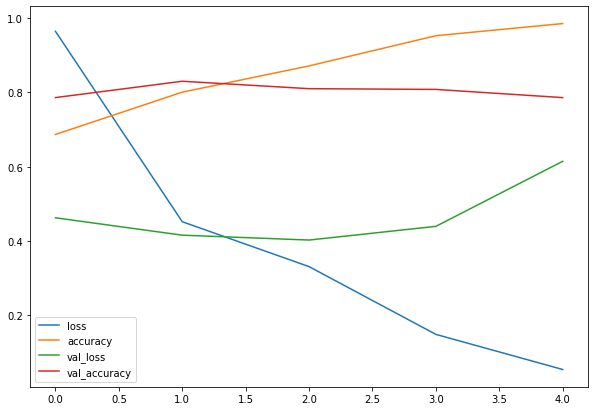

In [70]:
# Let's plot the training curve
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [71]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss'])) # how many epochs did we run for?

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_acccuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

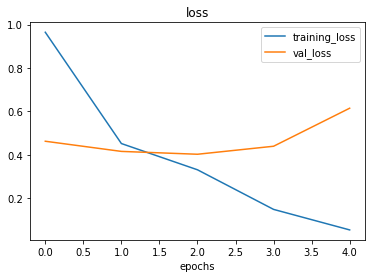

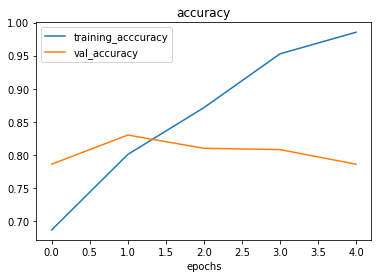

In [72]:
# Chekc out the loss and accuracy of model_4
plot_loss_curves(history_4)

> 🔑 **Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences, your model may be **overfitting**.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

> 🔑 **Note:** Reducing overfitting is also known as **regularization**.

In [73]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation='relu', 
           input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [74]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [75]:
# Fit the model
history_5 = model_5.fit(train_data_scaled,
                        epochs=5,
                        steps_per_epoch=len(train_data_scaled),
                        validation_data=test_data_scaled,
                        validation_steps=len(test_data_scaled))

Epoch 1/5
47/47 [==============================] - 5s 81ms/step - loss: 0.6028 - accuracy: 0.6840 - val_loss: 0.5362 - val_accuracy: 0.7560
Epoch 2/5
47/47 [==============================] - 5s 95ms/step - loss: 0.4837 - accuracy: 0.7927 - val_loss: 0.4045 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 5s 89ms/step - loss: 0.4265 - accuracy: 0.8153 - val_loss: 0.3850 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 4s 81ms/step - loss: 0.4169 - accuracy: 0.8167 - val_loss: 0.3487 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 4s 81ms/step - loss: 0.3965 - accuracy: 0.8320 - val_loss: 0.3375 - val_accuracy: 0.8520


In [76]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_19 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 26, 26, 10)      

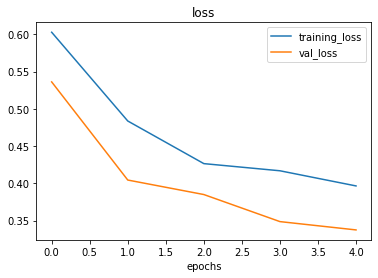

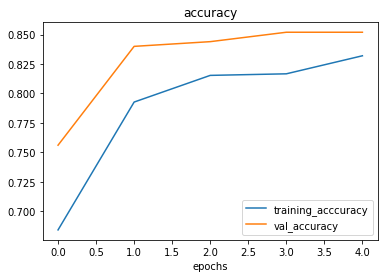

In [77]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [123]:
# Create training instance with data augmentation
scaling_layer = tf.keras.layers.Rescaling(1./255)
augmentation_layer = Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomTranslation(height_factor=0.3, width_factor=0.2),
    tf.keras.layers.RandomFlip(mode='horizontal'),
])

train_data = image_dataset_from_directory(directory=train_dir, # Target directory of images
                                          label_mode='binary', # type of data you're working with
                                          batch_size=32, # size of minibatches to load data into
                                          image_size=(224, 224), # Target size of images (height, width)
                                          shuffle=False, # for demo purpose only
                                          seed=42)
train_data_scaled_augmented = train_data.map(lambda x, y: (augmentation_layer(x), y))
train_data_scaled = train_data.map(lambda x, y: (scaling_layer(x), y))
test_data = image_dataset_from_directory(directory=test_dir,
                                          label_mode='binary',
                                          batch_size=32,
                                          image_size=(224, 224),
                                          seed=42)
test_data_scaled = valid_data.map(lambda x, y: (scaling_layer(x), y))

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


> 🤔 **Question:** What is data augmentation

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [124]:
# Import data and augment it from training directory
print("Augmented training data:")
train_data_scaled_augmented
print("Non-augmented training data:")
train_data_scaled

# Create non-augmented test data batches
print("Non-augmented test data:")
test_data_scaled

Augmented training data:
Non-augmented training data:
Non-augmented test data:


<MapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

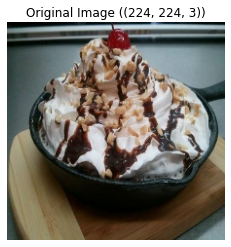

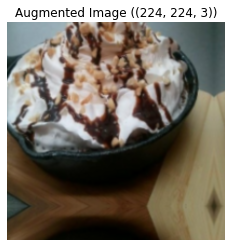

In [127]:
# Get sample augmented data batches
import random

random_number = random.randint(0, 32)
for images, labels in train_data_scaled.take(1):
    plt.imshow(images[random_number])
    plt.title(f'Original Image ({images[random_number].shape})')
    plt.axis(False)
for images, labels in train_data_scaled_augmented.take(1):
    plt.figure()
    plt.imshow(images[random_number])
    plt.title(f'Augmented Image ({images[random_number].shape})')
    plt.axis(False)

In [128]:
# Create model_6 with augmented data
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [129]:
# Compile model_6
model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit model_6
history_6 = model_6.fit(train_data_scaled_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_scaled_augmented),
                        validation_data=test_data_scaled,
                        validation_steps=len(test_data_scaled))

Epoch 1/5
47/47 [==============================] - 26s 535ms/step - loss: 2.5524 - accuracy: 0.7060 - val_loss: 0.8254 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 24s 504ms/step - loss: 0.8477 - accuracy: 0.3573 - val_loss: 0.7352 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 24s 506ms/step - loss: 0.7022 - accuracy: 0.4913 - val_loss: 2.0783 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 24s 505ms/step - loss: 0.8948 - accuracy: 0.3047 - val_loss: 0.6928 - val_accuracy: 0.4940
Epoch 5/5
10/47 [=====>........................] - ETA: 18s - loss: 0.7001 - accuracy: 0.0000e+00